<a href="https://colab.research.google.com/github/neiluz/IT_Academy_ProyectoFinal/blob/main/Notebooks/Notebook%207.2b%20Modelo%20Bert%20-%20Polarity%20-Balanceo%20clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 7.3b: Modelo Deep Learning con el modelo pre entrenado Bert - Polarity Vader - Balanceo de clases

En este notebook se presenta la evaluación del modelo pre-entrenado Bert en la tarea de clasificación de sentimientos en tweets. Para ello, se utilizó un dataset preprocesado en el que las emociones originales fueron transformadas men sentimientos positvos, negativos y neutros.

El modelo implementado es un clasificador de texto basado en técnicas de aprendizaje profundo (deep learning) que utiliza el modelo pre-entrenado BERT para clasificar los tweets en tres categorías: positivo, negativo y neutral. BERT, acrónimo de Bidirectional Encoder Representations from Transformers, es un modelo de lenguaje basado en Transformers que fue pre-entrenado en enormes cantidades de datos textuales, lo que le permite capturar patrones complejos en el lenguaje. Al utilizar un modelo pre-entrenado como BERT, se pueden obtener mejores resultados con menos datos de entrenamiento y menos tiempo de entrenamiento. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.7 MB/s eta 0:00:00


In [ ]:
# general purpose packages
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras

#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

#set seed for reproducibility
seed=42

import warnings
warnings.filterwarnings('ignore')

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [ ]:
df2 = pd.read_pickle('/content/dataset2.pickle')

In [ ]:
df2

,content,polarity_sent
0,layin bed headache ughhhhwaitin call,0
1,funeral ceremonygloomy friday,0
2,want hang friend soon,2
3,want trade someone houston ticket one,1
4,repinging didnt go prom bc bf didnt like friend,0
...,...,...
38983,succesfully following tayla,2
38984,happy mother day love,2
38985,happy mother day mommy woman man long youre mo...,2
38986,wassup beautiful follow peep new hit single ww...,2


## 1. Preparación del Dataset

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38988 entries, 0 to 38987
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        38988 non-null  object
 1   polarity_sent  38988 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 457.0+ KB


### 1.1 Verificar nulos y NaM

In [ ]:
df2.isnull().sum()

content          0
polarity_sent    0
dtype: int64

In [ ]:
df2.isna().sum()

content          0
polarity_sent    0
dtype: int64

* **Longitud del texto**

Se crea una columna para alojar la longitud del texto limpio

In [ ]:
text_len = []
for text in df2.content :
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [ ]:
df2['text_len'] = text_len

In [ ]:
df2.head()

,content,polarity_sent,text_len
0,layin bed headache ughhhhwaitin call,0,5
1,funeral ceremonygloomy friday,0,3
2,want hang friend soon,2,4
3,want trade someone houston ticket one,1,6
4,repinging didnt go prom bc bf didnt like friend,0,9


### 1.3 Limpieza más profunda

Se realizará si se puede reañizar una limpieza adicional verificando la versión tokenizadora de las oraciones.

* **Primero, importar el tokenizador BERT.**

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
token_lens = []

for txt in df2['content'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [ ]:
print(f"Maxima logitud de las oraciones TOKENIZED: {max_len}")

Maxima logitud de las oraciones TOKENIZED: 61


In [ ]:
df2['token_lens'] = token_lens

In [ ]:
df2.head()

,content,polarity_sent,text_len,token_lens
0,layin bed headache ughhhhwaitin call,0,5,13
1,funeral ceremonygloomy friday,0,3,8
2,want hang friend soon,2,4,6
3,want trade someone houston ticket one,1,6,8
4,repinging didnt go prom bc bf didnt like friend,0,9,14


<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Al tokenizar el texto, se observa que aumentan la cantidad de palabras en la oracion o tweet.

## 2. Modelo

### 2.1 Balanceo de clases by Undersampling

In [ ]:
df2['polarity_sent'].value_counts()

2    15279
0    15206
1     8503
Name: polarity_sent, dtype: int64

Se puede observar que existe un desblanceo marcado entre la clase negativa y las clases neutras y positivas, por lo que se procederá a realizar un balanceo de las clases.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
train_x, train_y = rus.fit_resample(np.array(df2['content']).reshape(-1, 1), np.array(df2['polarity_sent']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['content', 'polarity_sent']);

In [ ]:
# Obtener conteo de clases después del undersampling
train_os['polarity_sent'].value_counts()

0    8503
1    8503
2    8503
Name: polarity_sent, dtype: int64

### 2.2 Se define el target y la feature

In [ ]:
# Se define el target y la feature
X_rus = train_os['content'].values
y_rus = train_os['polarity_sent'].values

In [ ]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=42)

In [ ]:
# Dividir los datos de entrenamiento en entrenamiento y validación (70% - 15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (18429,)
X_test shape: (3827,)
y_train shape: (18429,)
y_test shape: (3827,)


### 2.2 One hot encoding

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

## 3.Modelo BERT

BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje basado en la arquitectura Transformer, que utiliza un enfoque bidireccional para el procesamiento de texto, lo que significa que considera el contexto completo de la oración en ambas direcciones para generar representaciones de palabras más precisas y contextualizadas.

El modelo BERT es pre-entrenado en grandes corpus de datos y luego se puede ajustar o fine-tunear para tareas específicas, como la clasificación de texto, la extracción de información o la generación de lenguaje natural. BERT ha establecido nuevos estándares de rendimiento en varias tareas de procesamiento de lenguaje natural y es ampliamente utilizado en la investigación y la industria.

### 3.1 Tokenizar el conjunto de datos

In [ ]:
max_len = 128

In [ ]:
def tokenize(data,max_lenmax_len) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

* Luego, aplica la función tokenizadora a los conjuntos de tren, validación y prueba.

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, max_len)
val_input_ids, val_attention_masks = tokenize(X_val, max_len)
test_input_ids, test_attention_masks = tokenize(X_test, max_len)

### 3.2 Creación  del modelo

In [ ]:
# importar el modelo BERT de la biblioteca preentrenada de Hugging face
bert_model = TFBertModel.from_pretrained('bert-base-uncased', num_labels=3)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
def create_model(bert_model, max_len=max_len):
    # Parámetros del optimizador
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999)

    # Función de pérdida y métrica de precisión
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    # Capa de entrada para los ids de las palabras y las máscaras de atención
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')

    # Capa de embeddings usando el modelo BERT pre-entrenado
    embeddings = bert_model([input_ids, attention_masks])[1]

    # Capa oculta completamente conectada con 256 unidades y función de activación relu
    hidden_layer = tf.keras.layers.Dense(256, activation='relu')(embeddings)

    # Agregar una capa de abandono con una tasa de abandono del 0.5
    dropout = tf.keras.layers.Dropout(0.5)(hidden_layer)

    # Capa de salida con activación softmax
    output = tf.keras.layers.Dense(3, activation='softmax')(dropout)

    # Creación del modelo con las capas de entrada, embeddings, capa oculta, salida y la capa de abandono
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

    # Compilación del modelo con optimizador, función de pérdida y métrica de precisión
    model.compile(optimizer=opt, loss=loss, metrics=[accuracy])

    # Visualización del modelo
    plot_model(model, to_file='modelo_clasificacion_tweets.png', show_shapes=True)

    return model

In [ ]:
model = create_model(bert_model, max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

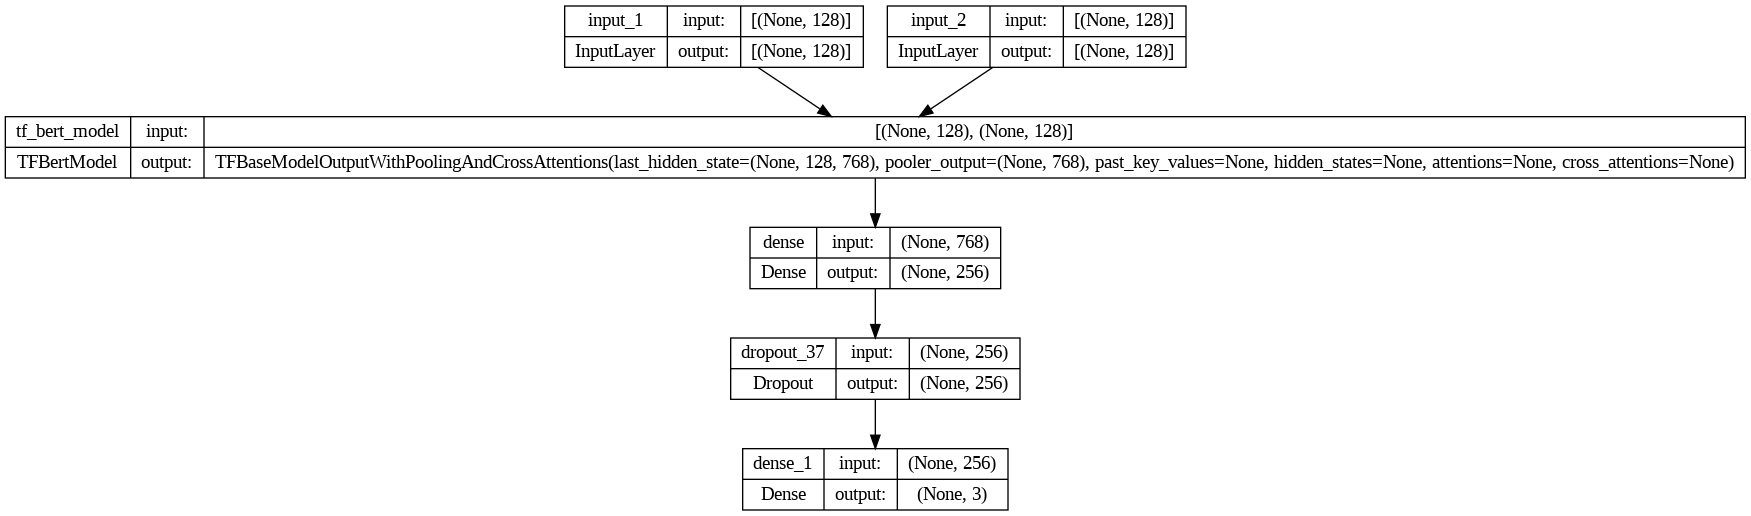

In [ ]:
from PIL import Image

# Visualiza la arquitectura del modelo y guarda la imagen
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Muestra la imagen en la pantalla
img = Image.open('model.png')
img.show()

### 3.2 Entrenar modelo

In [ ]:
# ajustar el transformador BERT
history_bert = model.fit([train_input_ids, train_attention_masks], y_train, validation_data=([val_input_ids, val_attention_masks], y_val), epochs=4, batch_size=32)

Epoch 1/4
576/576 [==============================] - 513s 805ms/step - loss: 1.0158 - categorical_accuracy: 0.4965 - val_loss: 0.9230 - val_categorical_accuracy: 0.5816
Epoch 2/4
576/576 [==============================] - 463s 803ms/step - loss: 0.8884 - categorical_accuracy: 0.6058 - val_loss: 0.9183 - val_categorical_accuracy: 0.5847
Epoch 3/4
576/576 [==============================] - 462s 803ms/step - loss: 0.8287 - categorical_accuracy: 0.6415 - val_loss: 0.9393 - val_categorical_accuracy: 0.5853
Epoch 4/4
576/576 [==============================] - 463s 803ms/step - loss: 0.7526 - categorical_accuracy: 0.6903 - val_loss: 0.9838 - val_categorical_accuracy: 0.5749


* **Precisión y la pérdida a lo largo del tiempo**

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


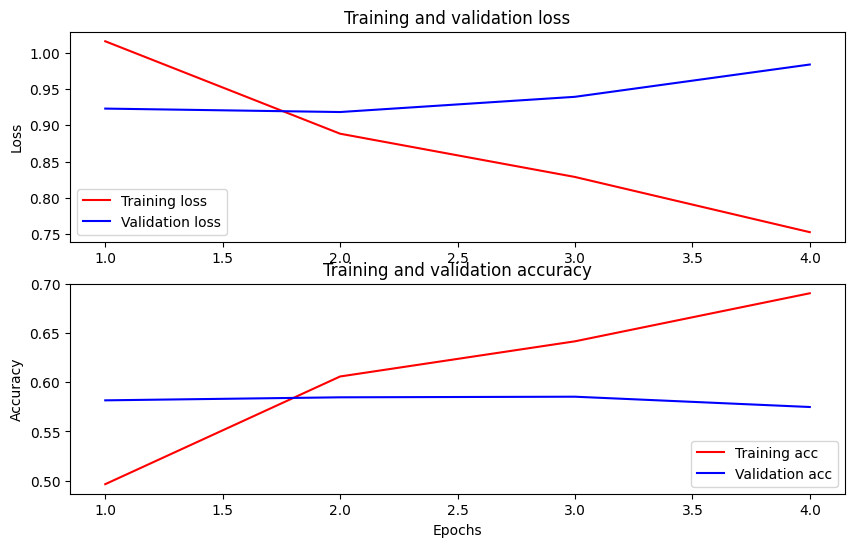

In [ ]:
history_dict = history_bert.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### 3.4. Predecir y evaluar el modelo 

In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

120/120 [==============================] - 36s 274ms/step


In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17) 
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

* **Evaluación del modelo**

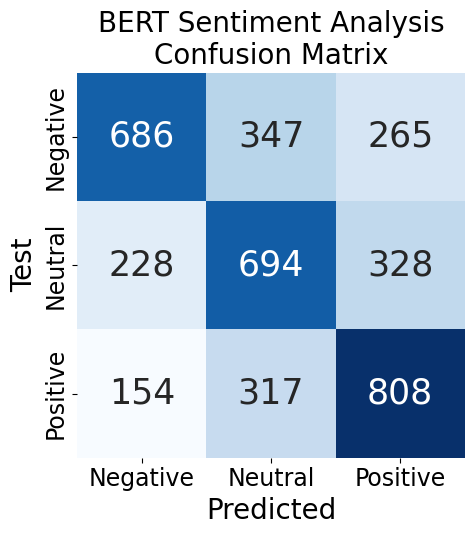

In [ ]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.64      0.53      0.58      1298
     Neutral       0.51      0.56      0.53      1250
    Positive       0.58      0.63      0.60      1279

   micro avg       0.57      0.57      0.57      3827
   macro avg       0.58      0.57      0.57      3827
weighted avg       0.58      0.57      0.57      3827
 samples avg       0.57      0.57      0.57      3827



## 4. Observaciones generales

Algunas observaciones que pueden extraerse de los resultados del modelo BERT son:
* Modelo: el modelo utilizado es una red neuronal basada en BERT, que es una arquitectura de aprendizaje profundo muy potente y ampliamente utilizada en el procesamiento del lenguaje natural.

* Parámetros: el modelo tiene un total de 109,679,875 parámetros, de los cuales todos son entrenables. Esto significa que se ajustaron durante el entrenamiento para mejorar la capacidad del modelo para realizar predicciones precisas.

* Entrenamiento: el modelo se entrenó durante cuatro épocas, cada una de ellas durante aproximadamente 460-510 segundos por época. Durante el entrenamiento, se observó una mejora en la precisión de la clasificación de la polaridad, ya que la precisión categórica pasó del 49.65% al 69.03%.

* Validación: durante la validación, el modelo logró una precisión categórica del 57.49%, lo que indica que el modelo es capaz de clasificar correctamente las opiniones en términos de su polaridad.

* Reporte de clasificación: el modelo se evaluó utilizando un conjunto de datos de prueba y se generó un reporte de clasificación. En el reporte, se puede observar que el modelo tuvo una precisión general del 57%, con una precisión en la detección de opiniones negativas del 64%, en la detección de opiniones neutrales del 51%, y en la detección de opiniones positivas del 58%. Además, se proporcionan los puntajes de precisión, recuperación y F1 para cada clase de polaridad.

* Se observar que la pérdida en la validación (línea naranja) es bastante irregular y fluctúa entre valores altos y bajos, mientras que la pérdida en el entrenamiento (línea azul) disminuye constantemente a medida que se entrenan más épocas. Esto puede indicar que el modelo está sobreajustando (overfitting) los datos de entrenamiento, lo que significa que el modelo está aprendiendo demasiado los detalles específicos de los datos de entrenamiento y no generalizando lo suficiente para datos nuevos y desconocidos.